In [1]:
from kid_readout.analysis import resonator
from kid_readout.analysis import plot_resonator

In [2]:
f_GHz, s21_mag, s21_angle = np.loadtxt('2014-07-17_nine-element_resonance.s2p', unpack=True, usecols=[0, 3, 4], skiprows=23)

In [3]:
s21 = s21_mag * np.exp(1j * s21_angle)

In [4]:
f_MHz = 1e3 * f_GHz

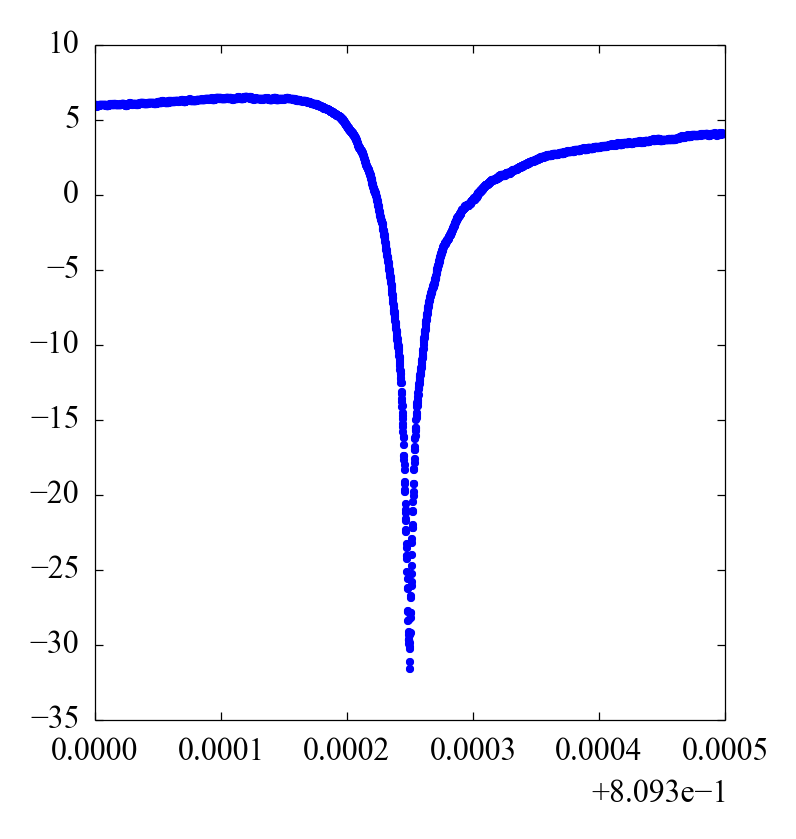

In [5]:
fig, ax = plt.subplots()
ax.plot(f_GHz, 20*np.log10(s21_mag), '.')

In [7]:
off_resonance = (s21_mag[0] + s21_mag[-1]) / 2
s21_normalized = s21_mag / off_resonance
min_index = np.argmin(s21_normalized)
f_0 = f_GHz[min_index]
s21_min = s21_normalized[min_index]
half_power_value = 1 - (1 - s21_min**2) / 2
half_power_left_index = np.argmin(np.abs(s21_normalized[:min_index]**2 - half_power_value))
half_power_right_index = np.argmin(np.abs(s21_normalized[min_index:]**2 - half_power_value)) + min_index
delta_f = f_GHz[half_power_right_index] - f_GHz[half_power_left_index]
Q_r = f_0 / delta_f
Q_c = Q_r / (1 - s21_min)
Q_i = Q_r / s21_min
tau_r = (np.pi * 1e9 * delta_f)**-1
s21_model = 1 - Q_r * Q_c**-1 * (1 + 2j * Q_r * (f_GHz - f_0) / f_0)**-1

In [8]:
1e3 * f_0 # In MHz

809.55012499999998

In [9]:
1e6 * delta_f # in kHz

128.37499999995839

In [10]:
Q_r

6306.1353456690358

In [11]:
Q_c

6399.9297568597221

In [12]:
Q_i

430290.27782349975

In [13]:
tau_r

2.4795317326885595e-06

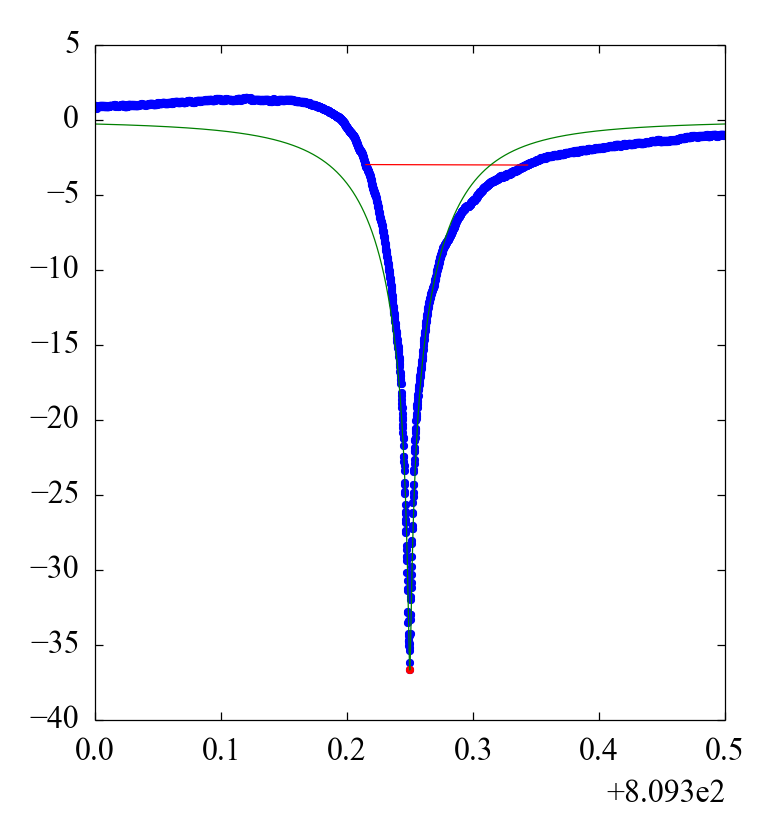

In [19]:
f_scale = 1e3 # Plot MHZ instead of GHz
fig, ax = plt.subplots()
ax.plot(f_scale*f_GHz, 20*np.log10(s21_normalized), '.')
ax.plot(f_scale*f_0, 20*np.log10(s21_min), '.r')
ax.plot(f_scale*np.array([f_GHz[half_power_left_index], f_GHz[half_power_right_index]]),
        20*np.log10(np.array([s21_normalized[half_power_left_index], s21_normalized[half_power_right_index]])), '-r')
ax.plot(f_scale*f_GHz, 20*np.log10(np.abs(s21_model)), '-g')

This obviously doesn't work yet. Looks like the fitting needs help with the phase.

In [16]:
r = resonator.Resonator(f_MHz, s21)

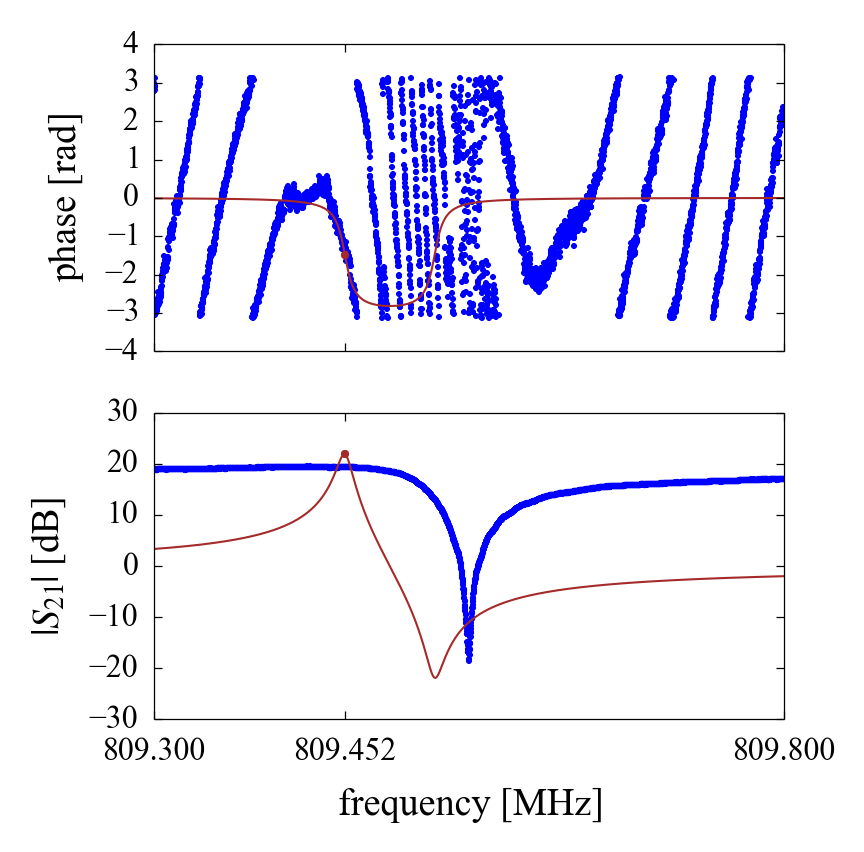

In [17]:
fig = plot_resonator.amplitude_and_phase(r, normalize_s21=True)